In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn import metrics 

In [2]:
# Loading the data into Pandas
df = pd.read_csv(r'C:\Users\sunita.chalwadi\Desktop\ML\us-counties.csv')
df.head(100)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
95,2020-02-07,Snohomish,Washington,53061.0,1,0
96,2020-02-07,Dane,Wisconsin,55025.0,1,0
97,2020-02-08,Maricopa,Arizona,4013.0,1,0
98,2020-02-08,Los Angeles,California,6037.0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313348 entries, 0 to 313347
Data columns (total 6 columns):
date      313348 non-null object
county    313348 non-null object
state     313348 non-null object
fips      310087 non-null float64
cases     313348 non-null int64
deaths    313348 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 14.3+ MB


In [4]:
total=df.groupby(['state']).agg({'cases':['sum']})
total.columns=['total_cases']

In [5]:
cases=total.nlargest(10,['total_cases'])
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

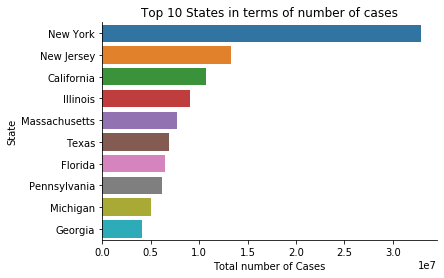

In [6]:
sns.barplot(x='total_cases',y=cases.index,data=cases,orient='h')
plt.title('Top 10 States in terms of number of cases')
plt.ylabel('State')
plt.xlabel('Total number of Cases')
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [7]:
total=df.groupby(['date']).agg({'deaths':['sum']})
total.columns=['total_deaths']

In [8]:
cases=total.nlargest(10,['total_deaths'])
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [9]:
# checking the data and ki 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313348 entries, 0 to 313347
Data columns (total 6 columns):
date      313348 non-null object
county    313348 non-null object
state     313348 non-null object
fips      310087 non-null float64
cases     313348 non-null int64
deaths    313348 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 14.3+ MB


In [10]:
#sns.barplot(x='total_cases',y=cases.index,data=cases,orient='h')
#plt.title('Top 10 dates in terms of number of cases')
#plt.ylabel('State')
#plt.xlabel('Total number of Cases')
#ax=plt.gca()
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

In [11]:
# convert date from object to datetime
df['date'] = df['date'].astype(str)
df['date']= pd.to_datetime(df['date']) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313348 entries, 0 to 313347
Data columns (total 6 columns):
date      313348 non-null datetime64[ns]
county    313348 non-null object
state     313348 non-null object
fips      310087 non-null float64
cases     313348 non-null int64
deaths    313348 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 14.3+ MB


In [13]:
df['deaths'].value_counts()

0       151846
1        42627
2        21241
3        12087
4         8580
         ...  
2031         1
883          1
1650         1
3187         1
1791         1
Name: deaths, Length: 1832, dtype: int64

In [14]:
df.isnull().sum()

date         0
county       0
state        0
fips      3261
cases        0
deaths       0
dtype: int64

In [15]:
df['fips'].fillna(df['fips'].mean(),inplace=True)

In [16]:
df.isnull().sum()

date      0
county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [17]:
df_num = df.select_dtypes(["int64","float64","datetime64"])
df_cat = df.select_dtypes("object")

In [18]:
df_cat.head()

,county,state
0,Snohomish,Washington
1,Snohomish,Washington
2,Snohomish,Washington
3,Cook,Illinois
4,Snohomish,Washington


In [19]:
df_num.head()

,date,fips,cases,deaths
0,2020-01-21,53061.0,1,0
1,2020-01-22,53061.0,1,0
2,2020-01-23,53061.0,1,0
3,2020-01-24,17031.0,1,0
4,2020-01-24,53061.0,1,0


In [20]:
state= "California"

In [21]:
state_df=df[df["state"]==state]

In [22]:
state_df.head()

,date,county,state,fips,cases,deaths
5,2020-01-25,Orange,California,6059.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0
10,2020-01-26,Orange,California,6059.0,1,0
14,2020-01-27,Los Angeles,California,6037.0,1,0
15,2020-01-27,Orange,California,6059.0,1,0


In [23]:
state_df.drop("state", axis =1, inplace = True)

C:\Users\sunita.chalwadi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
state_df.head()

,date,county,fips,cases,deaths
5,2020-01-25,Orange,6059.0,1,0
9,2020-01-26,Los Angeles,6037.0,1,0
10,2020-01-26,Orange,6059.0,1,0
14,2020-01-27,Los Angeles,6037.0,1,0
15,2020-01-27,Orange,6059.0,1,0


In [25]:
state_df_num = state_df.select_dtypes(["int64","float64","datetime64"])
state_df_cat = state_df.select_dtypes("object")

In [26]:
state_df_cat.head()

,county
5,Orange
9,Los Angeles
10,Orange
14,Los Angeles
15,Orange


In [27]:
state_df.corr()

,fips,cases,deaths
fips,1.000000,-0.009869,-0.008773
cases,-0.009869,1.000000,0.981288
deaths,-0.008773,0.981288,1.000000


In [28]:
county='Los Angeles'

In [29]:
county_df=state_df[df["county"]==county]

C:\Users\sunita.chalwadi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [30]:
county_df.head()

,date,county,fips,cases,deaths
9,2020-01-26,Los Angeles,6037.0,1,0
14,2020-01-27,Los Angeles,6037.0,1,0
19,2020-01-28,Los Angeles,6037.0,1,0
24,2020-01-29,Los Angeles,6037.0,1,0
29,2020-01-30,Los Angeles,6037.0,1,0


In [31]:
county_df.drop("county", axis =1, inplace = True)

In [32]:
county_df= county_df.reset_index() 

In [33]:
county_df.head()

,index,date,fips,cases,deaths
0,9,2020-01-26,6037.0,1,0
1,14,2020-01-27,6037.0,1,0
2,19,2020-01-28,6037.0,1,0
3,24,2020-01-29,6037.0,1,0
4,29,2020-01-30,6037.0,1,0


In [34]:
county_df.drop("index", axis =1, inplace = True)

In [35]:
county_df['Total cases'] = county_df['cases'].cumsum()
county_df['Total deaths'] = county_df['deaths'].cumsum()

In [36]:
county_df.head(10)

,date,fips,cases,deaths,Total cases,Total deaths
0,2020-01-26,6037.0,1,0,1,0
1,2020-01-27,6037.0,1,0,2,0
2,2020-01-28,6037.0,1,0,3,0
3,2020-01-29,6037.0,1,0,4,0
4,2020-01-30,6037.0,1,0,5,0
5,2020-01-31,6037.0,1,0,6,0
6,2020-02-01,6037.0,1,0,7,0
7,2020-02-02,6037.0,1,0,8,0
8,2020-02-03,6037.0,1,0,9,0
9,2020-02-04,6037.0,1,0,10,0


In [37]:
county_df.drop(['cases','deaths'],axis=1,inplace=True)

In [38]:
county_df.head(10)

,date,fips,Total cases,Total deaths
0,2020-01-26,6037.0,1,0
1,2020-01-27,6037.0,2,0
2,2020-01-28,6037.0,3,0
3,2020-01-29,6037.0,4,0
4,2020-01-30,6037.0,5,0
5,2020-01-31,6037.0,6,0
6,2020-02-01,6037.0,7,0
7,2020-02-02,6037.0,8,0
8,2020-02-03,6037.0,9,0
9,2020-02-04,6037.0,10,0


In [39]:
county_df['date'].min()

Timestamp('2020-01-26 00:00:00')

In [40]:
county_df['date'].max()

Timestamp('2020-07-09 00:00:00')

In [41]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 4 columns):
date            166 non-null datetime64[ns]
fips            166 non-null float64
Total cases     166 non-null int64
Total deaths    166 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.3 KB


In [42]:
county_df.corr()

,fips,Total cases,Total deaths
fips,NaN,NaN,NaN
Total cases,NaN,1.000000,0.998327
Total deaths,NaN,0.998327,1.000000


In [43]:
#df_num=county_df.select_dtypes(["int64","float64","int32"])
#df_cat=county_df.select_dtypes(["object","datetime64[ns]"])

In [44]:
#df_cat.head()

In [45]:
df_num=county_df.select_dtypes(["int64","float64","int32"])
df_cat=county_df.select_dtypes(["object","datetime64[ns]"])
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

C:\Users\sunita.chalwadi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
county_df=pd.concat([df_num,df_cat],axis=1)

In [47]:
county_df.head()

,fips,Total cases,Total deaths,date
0,6037.0,1,0,0
1,6037.0,2,0,1
2,6037.0,3,0,2
3,6037.0,4,0,3
4,6037.0,5,0,4


In [59]:
county_df['date'].max()

165

In [48]:
county_df.corr()

,fips,Total cases,Total deaths,date
fips,NaN,NaN,NaN,NaN
Total cases,NaN,1.000000,0.998327,0.844477
Total deaths,NaN,0.998327,1.000000,0.855021
date,NaN,0.844477,0.855021,1.000000


In [49]:
df_cases=county_df.drop(['fips','Total deaths'],axis=1)

In [50]:
df_cases.corr()

,Total cases,date
Total cases,1.000000,0.844477
date,0.844477,1.000000


In [51]:
y=df_cases['Total cases']
x=df_cases[['date']]

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [53]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.6971125247433249

In [60]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2)
x_poly = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly,y,random_state=1,test_size=0.2)
lr_cases = LinearRegression()
lr_cases.fit(x_train,y_train)
y_pred = lr_cases.predict(x_test)
r2_score(y_test, y_pred)

0.9638565213478166

In [65]:
#y_pred_cases=lr_cases.predict([[180,]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

In [55]:
df_cases=county_df.drop('fips',axis=1)

In [56]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 3 columns):
Total cases     166 non-null int64
Total deaths    166 non-null int64
date            166 non-null int64
dtypes: int64(3)
memory usage: 4.0 KB


In [57]:
y_death=df_cases['Total deaths']
x_death=df_cases.drop('Total deaths',axis=1)

In [58]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2)
x_poly = pf.fit_transform(x_death)
x_train, x_test, y_train, y_test = train_test_split(x_poly,y_death,random_state=1,test_size=0.2)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.9999256067124882

In [ ]:
#y_pred_1=lr.predict([''])